In [ ]:
!pip install python-mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
#Loading data
from mnist import MNIST

mnistdata = MNIST()

#xtrain= training_images ,ytrain = training_labels
#xtest = test_images, y_test = test_labels
training_images , training_labels = mnistdata.load_training()
testing_images,testing_labels = mnistdata.load_testing()

## Data preparation

In [ ]:
x_y_train_np = np.array(training_images).reshape(len(training_images),28,28)#creating the 2-d numpy array (so can get access to predefinrd methods)
x_y_test_np = np.array(testing_images).reshape(len(testing_images),28,28)
x_y_train = {"image_data":list(x_y_train_np),"label":list(training_labels)} # creating a dtaframe of training data
dfm_train = pd.DataFrame(x_y_train) 
dfm_train  

,image_data,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9
...,...,...
59995,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
59996,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
59997,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5
59998,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",6


In [ ]:
x_y_test = {"image_data":list(x_y_test_np),"label":list(testing_labels)} # Iam passing dictionary to create dataframe keys as names and values as lists
dfm_test = pd.DataFrame(x_y_test) #creating a dataframe of testing data
dfm_test

,image_data,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",7
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4
...,...,...
9995,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
9996,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
9997,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4
9998,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5


### Visuaize the data

In [ ]:
unique_image_dict ={}
labels = sorted(list(dfm_train["label"].unique()))#taking out the unique labels

In [ ]:
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
for label in labels:#In the unique_image_dictionary storing unique labels in two in number and resetting the index i.e.,0 and 1 here as there are two labels
  unique_image_dict[label] = dfm_train[dfm_train["label"]==label].head(2).reset_index(drop=True)#imshow accepts 2-d array to display

In [ ]:
unique_image_dict

{0:                                           image_data  label
 0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      0
 1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      0,
 1:                                           image_data  label
 0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      1
 1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      1,
 2:                                           image_data  label
 0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      2
 1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      2,
 3:                                           image_data  label
 0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      3
 1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      3,
 4:                                           image_data  label
 0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      4
 1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      4,
 5:                                           image_data  label
 

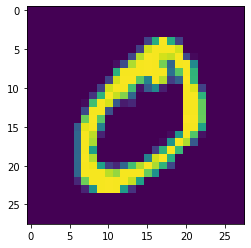

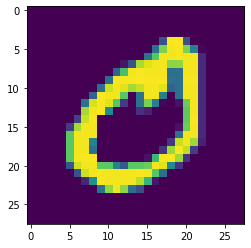

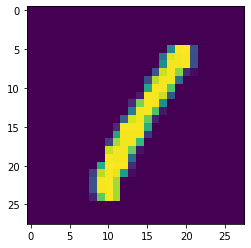

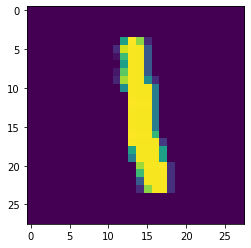

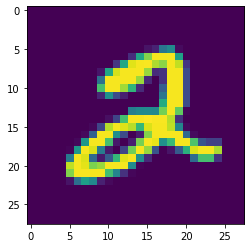

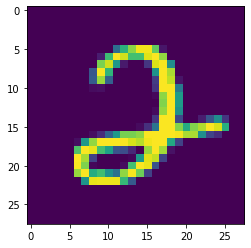

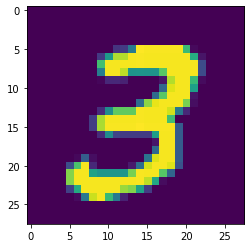

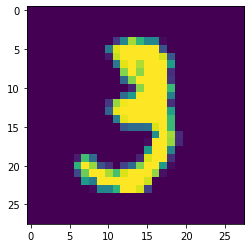

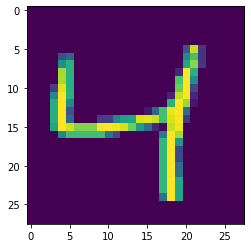

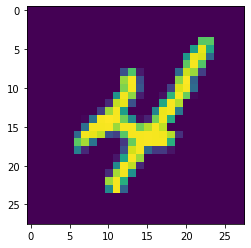

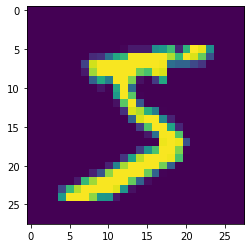

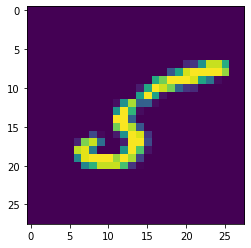

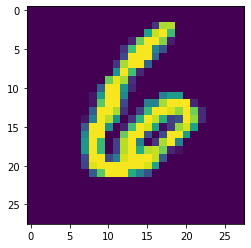

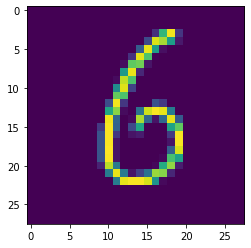

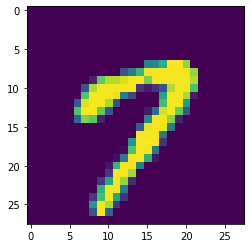

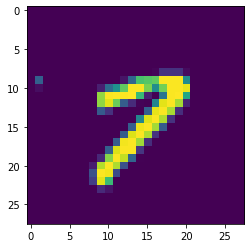

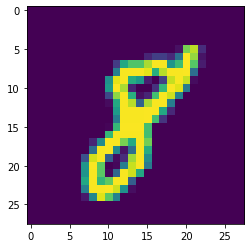

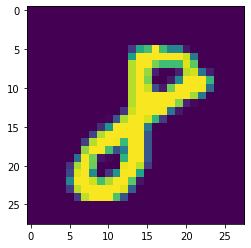

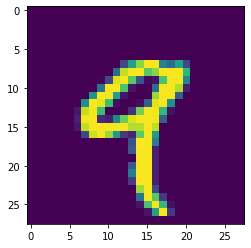

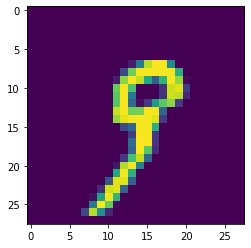

In [ ]:
for i in labels:#displaying the each label twice
  plt.imshow(unique_image_dict[i]['image_data'][0])
  plt.show()
  plt.imshow(unique_image_dict[i]['image_data'][1])
  plt.show()

## **One vs all**

In [ ]:
from sklearn.linear_model import LogisticRegression
#scaling the dataset using max value
max_value = x_y_train_np.max()
training_images = training_images/max_value
#flattening(label data will be in one single row) the training images to original form
x = np.array(training_images).reshape(len(training_images),28*28)
#training the model
classifier = LogisticRegression(multi_class='ovr',n_jobs = -1 , random_state =4)#n_jobs = -1 uses all the processors
classifier.fit(x,training_labels) 

LogisticRegression(multi_class='ovr', n_jobs=-1, random_state=4)

+ fitting the model to validation set

In [ ]:
testing_images = np.array(testing_images).reshape(len(testing_images),28*28)
y_predict = classifier.predict(testing_images) 

+ finding the metrics

In [ ]:
from sklearn.metrics import confusion_matrix
testing_labels_np = np.array(testing_labels)
Confn_matrix = confusion_matrix(testing_labels_np, y_predict)
print(Confn_matrix)

[[960   0   0   2   0   0   4   1  12   1]
 [  0 875   2   4   0   0   3   1 249   1]
 [  8   2 808  27   3   0  15   3 161   5]
 [  4   0   7 906   1   0   5   1  82   4]
 [  4   0   5   4 773   0  14   1 114  67]
 [ 20   1   0  89   6 314  22   4 419  17]
 [ 10   1   4   1   2   2 903   0  35   0]
 [  7   1  15  15   4   0   1 809  61 115]
 [  6   0   2   9   4   1   4   1 944   3]
 [ 11   2   0   9   4   0   0   1 102 880]]


In [ ]:
accuracy_ovr = Confn_matrix.diagonal()/Confn_matrix.sum()
accuracy_ovr

array([0.096 , 0.0875, 0.0808, 0.0906, 0.0773, 0.0314, 0.0903, 0.0809,
       0.0944, 0.088 ])

## **One vs One**

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
#training the model
logreg_ovo = LogisticRegression(n_jobs = -1,random_state = 0)
ovoclassifier = OneVsOneClassifier(logreg_ovo,n_jobs = -1)

+ fitting the model to validation set

In [ ]:
ovoclassifier.fit(x,training_labels)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


OneVsOneClassifier(estimator=LogisticRegression(n_jobs=-1, random_state=0),
                   n_jobs=-1)

+ fitting the model to validation set

In [ ]:
testing_images = np.array(testing_images).reshape(len(testing_images),28*28)
y_predict_ovo = ovoclassifier.predict(testing_images)

+ finding the metrics

In [ ]:
from sklearn.metrics import confusion_matrix
testing_labels_np = np.array(testing_labels)
Confn_matrix_1 = confusion_matrix(testing_labels_np, y_predict_ovo)
print(Confn_matrix_1)

[[969   0   0   2   1   0   3   1   3   1]
 [  0 966   4   4   0   1   4   0 155   1]
 [ 18   3 854  31   6   0  20   3  95   2]
 [  5   0   1 929   0   1   4   1  65   4]
 [  3   0   4   1 889   0  15   0  21  49]
 [ 24   1   2 103  10 382  18   1 332  19]
 [ 15   1   4   1   2   2 923   0  10   0]
 [  3   2  13  20  13   0   0 847  52  78]
 [  8   1   1  10   3   1   5   0 945   0]
 [ 11   1   0  13  11   0   0   1  59 913]]


In [ ]:
accuracy_ovo = Confn_matrix.diagonal()/Confn_matrix.sum()
accuracy_ovo

array([0.096 , 0.0875, 0.0808, 0.0906, 0.0773, 0.0314, 0.0903, 0.0809,
       0.0944, 0.088 ])